Importing the libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from IPython.core.debugger import set_trace

np.random.seed(108)

# **1- KNN and DT on Hepatitis Dataset**

# Exploratory Data Analysis

## Importing the first dataset

Fetch the dataset from UCI repository
http://archive.ics.uci.edu/ml/datasets/Hepatitis

In [2]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# metadata
print(hepatitis.metadata)

# variable information
print(hepatitis.variables)

{'uci_id': 46, 'name': 'Hepatitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/46/hepatitis', 'data_url': 'https://archive.ics.uci.edu/static/public/46/data.csv', 'abstract': 'From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 155, 'num_features': 19, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1983, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Q59J', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Please ask Gail Gong for further information on this database.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_descri

## Removing missing values

In [3]:
# data (as pandas dataframes)
X = hepatitis.data.features
y = hepatitis.data.targets
XY = pd.concat([X, y], axis = 1)
XY.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,2
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,2
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,2
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,2
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,2


In [4]:
#Check the number of missing values for each feature
XY.isnull().sum()

,0
Age,0
Sex,0
Steroid,1
Antivirals,0
Fatigue,1
Malaise,1
Anorexia,1
Liver Big,10
Liver Firm,11
Spleen Palpable,5


In [5]:
#Drop the missing values and reset the index of the rows
XY = XY.dropna().reset_index(drop = True)

XY.head(10)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
0,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1,2
1,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1,2
2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1,2
3,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1,2
4,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1,2
5,38,1,1.0,2,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,72.0,89.0,2.9,46.0,1,2
6,40,1,1.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.6,62.0,166.0,4.0,63.0,1,2
7,38,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,53.0,42.0,4.1,85.0,2,2
8,38,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0.7,70.0,28.0,4.2,62.0,1,2
9,22,2,2.0,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,48.0,20.0,4.2,64.0,1,2


## Correlation of features with target

How does the data correlate with the target 'class' data?

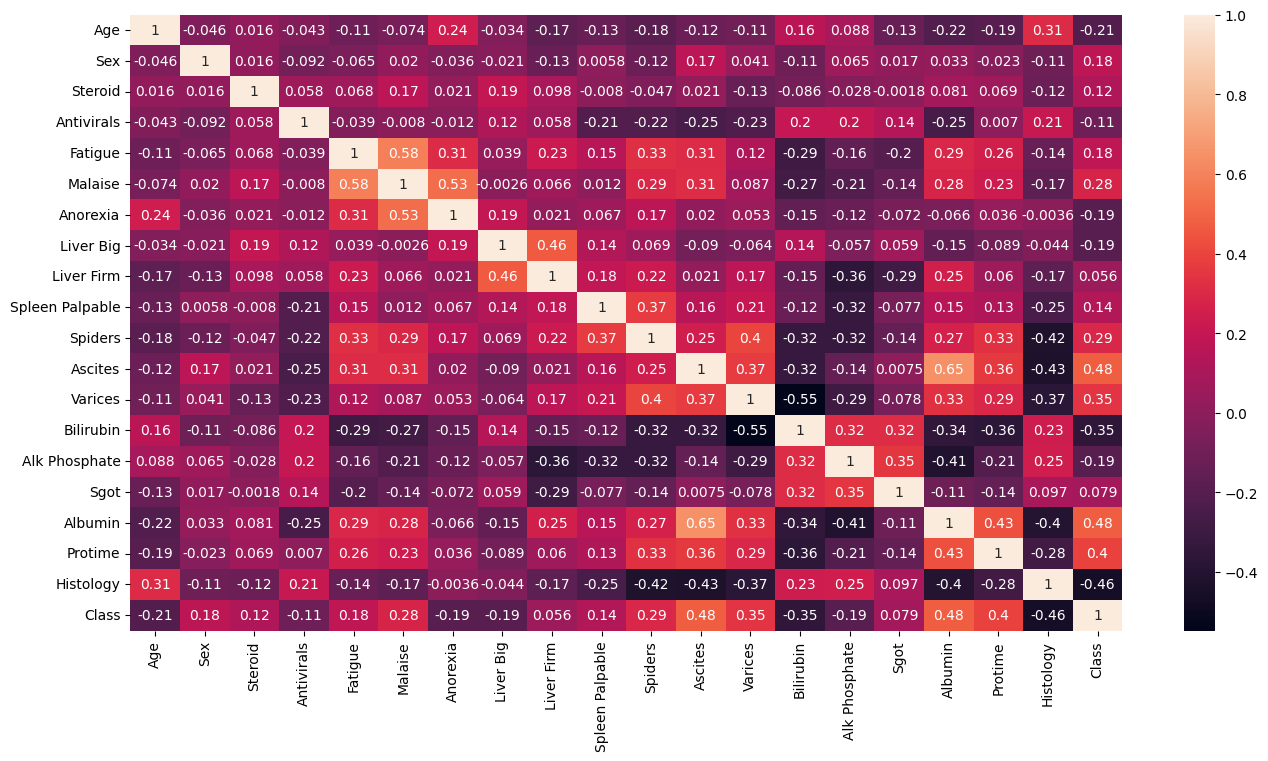

In [6]:
plt.figure(figsize = (16,8))
sns.heatmap(XY.corr(), annot=True)
plt.show()

## Organizing the binary values

Modify the binary values from (1,2) to (0,1)

In [7]:
XY = XY.replace(1,0)
XY = XY.replace(2,1)

XY.head(10)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
0,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,95.0,28.0,4.0,75.0,0,1
1,39,0,0.0,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.3,78.0,30.0,4.4,85.0,0,1
2,32,0,1.0,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,59.0,249.0,3.7,54.0,0,1
3,41,0,1.0,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,81.0,60.0,3.9,52.0,0,1
4,30,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.2,57.0,144.0,4.9,78.0,0,1
5,38,0,0.0,1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,72.0,89.0,2.9,46.0,0,1
6,40,0,0.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.6,62.0,166.0,4.0,63.0,0,1
7,38,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,53.0,42.0,4.1,85.0,1,1
8,38,0,0.0,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,70.0,28.0,4.2,62.0,0,1
9,22,1,1.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,48.0,20.0,4.2,64.0,0,1


## Data basic stats and distributions

Compute basic statistics and the distributions of the features and the target data.

In [8]:
XY.describe()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,40.66250,0.137500,0.525000,0.737500,0.350000,0.612500,0.850000,0.837500,0.525000,0.812500,0.687500,0.850000,0.875000,0.996250,102.912500,82.025000,3.843750,62.512500,0.41250,0.837500
std,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.996379,53.684779,71.599974,0.576292,23.427774,0.49539,0.371236
min,20.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,14.000000,2.100000,0.000000,0.00000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.500000,68.250000,30.750000,3.500000,46.000000,0.00000,1.000000
50%,38.50000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.700000,85.000000,56.500000,4.000000,62.000000,0.00000,1.000000
75%,49.25000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.300000,133.500000,102.750000,4.200000,77.250000,1.00000,1.000000
max,72.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.800000,280.000000,420.000000,5.000000,100.000000,1.00000,1.000000


### Distribution of the target

<ipython-input-9-5a8d1afe5b25>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  class_count = sns.countplot(x="Class", data = XY, palette=["orange", "blue"])
<ipython-input-9-5a8d1afe5b25>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Death','Alive']);


Text(0.5, 1.0, 'Count of Outcome')

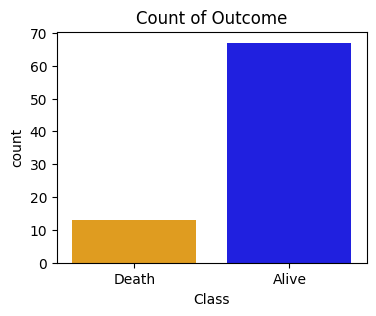

In [9]:
plt.figure(figsize=(4, 3))
class_count = sns.countplot(x="Class", data = XY, palette=["orange", "blue"])
plt.gca().set_xticklabels(['Death','Alive']);
class_count.set_title("Count of Outcome")

Note from the figure above that the target or outcome is unbalanced

### Distribution of continuous features

<ipython-input-10-f07a1e95c9f0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  XY[['Age','Bilirubin','Alk Phosphate','Sgot','Albumin','Protime']].hist(ax = ax)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Bilirubin'}>],
       [<Axes: title={'center': 'Alk Phosphate'}>,
        <Axes: title={'center': 'Sgot'}>],
       [<Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Protime'}>]], dtype=object)

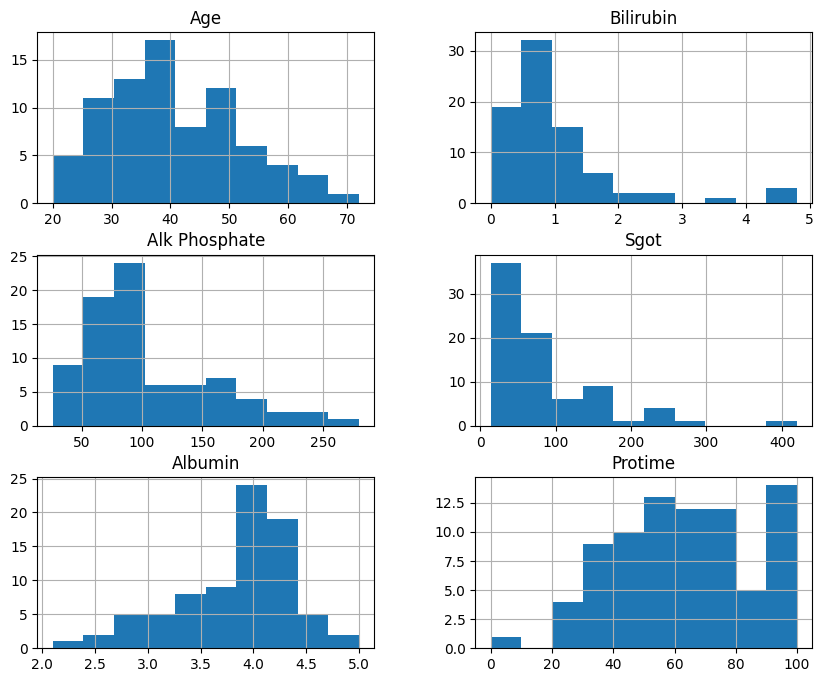

In [10]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
XY[['Age','Bilirubin','Alk Phosphate','Sgot','Albumin','Protime']].hist(ax = ax)

### Distribution of categorical features

<ipython-input-11-3d3c37751d37>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  XY[['Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Histology']].hist(ax = ax)


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Steroid'}>,
        <Axes: title={'center': 'Antivirals'}>,
        <Axes: title={'center': 'Fatigue'}>],
       [<Axes: title={'center': 'Malaise'}>,
        <Axes: title={'center': 'Anorexia'}>,
        <Axes: title={'center': 'Liver Big'}>,
        <Axes: title={'center': 'Liver Firm'}>],
       [<Axes: title={'center': 'Spleen Palpable'}>,
        <Axes: title={'center': 'Spiders'}>,
        <Axes: title={'center': 'Ascites'}>,
        <Axes: title={'center': 'Varices'}>],
       [<Axes: title={'center': 'Histology'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

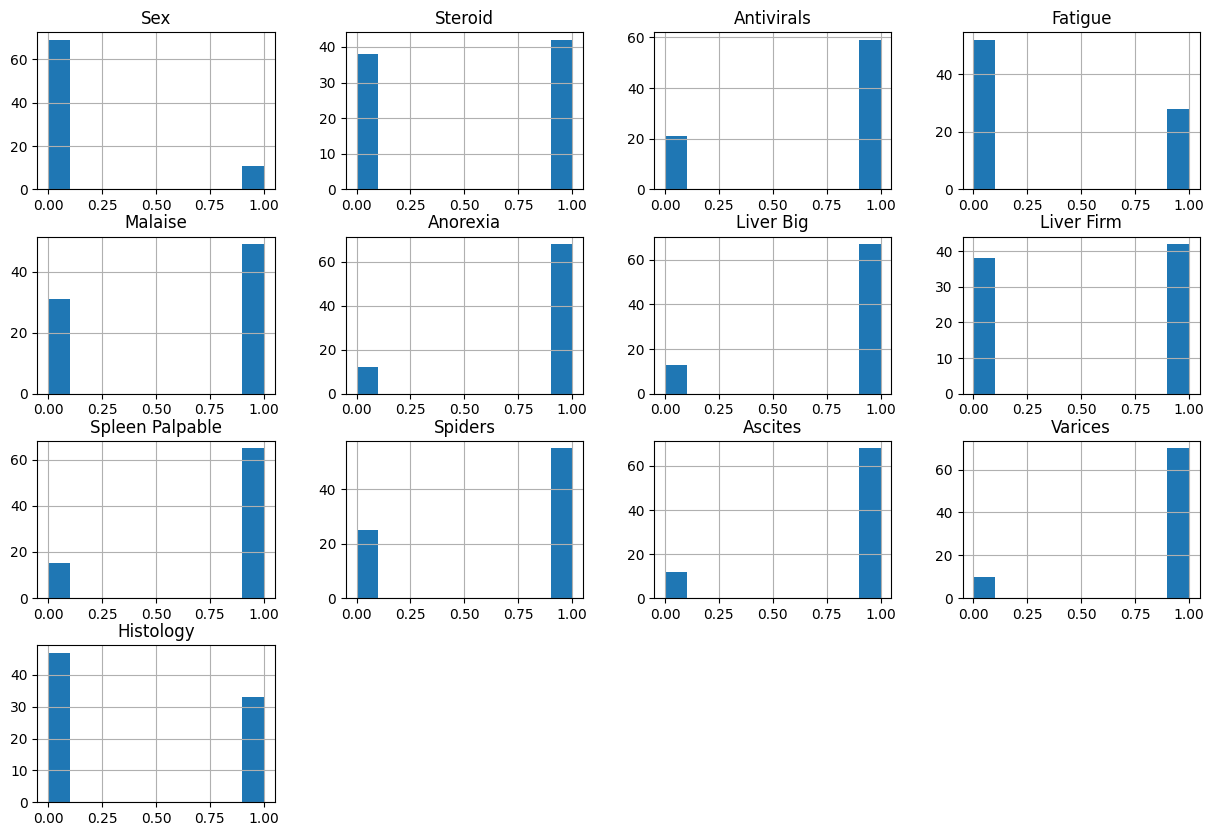

In [11]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
XY[['Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Histology']].hist(ax = ax)

## Feature importance using statistical analysis

KNN model doesn't automatically decide which features are the most important.
I test the feature importance with the binary target data using:
- ANOVA test for the numerical features
- Chi-square test for the categorical features

### Feature importance using ANOVA test

In [12]:
from scipy.stats import f_oneway

Columns = ['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']
XY_clean = XY.dropna(subset=Columns + ['Class'])

for column in Columns:
    groups = XY_clean.groupby('Class')[column].apply(list)

    # Check we have at least two groups with more than 1 value
    if len(groups) >= 2 and all(len(g) > 1 for g in groups):
        anova = f_oneway(*groups)
        print(f"{column} - F-statistic: {anova.statistic:.4f}")
        print(f"{column} - P-Value: {anova.pvalue:.4f}")
    else:
        print(f"{column} - Not enough data for ANOVA")
    print()

Age - F-statistic: 3.6985
Age - P-Value: 0.0581

Bilirubin - F-statistic: 10.2266
Bilirubin - P-Value: 0.0020

Alk Phosphate - F-statistic: 2.9009
Alk Phosphate - P-Value: 0.0925

Sgot - F-statistic: 0.4865
Sgot - P-Value: 0.4876

Albumin - F-statistic: 23.0251
Albumin - P-Value: 0.0000

Protime - F-statistic: 14.4532
Protime - P-Value: 0.0003



From the above results, the most important features are the ones with the highest F-Statistic; so, the best 3 in descending order are: Albumin, Protime and Bilirubin.

### Feature importance using Chi² test

In [13]:
from scipy.stats import chi2_contingency

Columns = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
           'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
           'Ascites', 'Varices', 'Histology']

for column in Columns:
    # Drop rows with NaNs in the current column or 'Class'
    data_clean = XY.dropna(subset=[column, 'Class'])

    # Create contingency table
    table = pd.crosstab(data_clean['Class'], data_clean[column])

    # Check for valid shape
    if table.shape[0] >= 2 and table.shape[1] >= 2:
        chi2_stat, p_value, dof, expected = chi2_contingency(table)
        print(f"{column} - Chi\u00b2 statistic: {chi2_stat:.4f}")
        print(f"{column} - P-Value: {p_value:.4f}")
    else:
        print(f"{column} - Not enough data for Chi-square test")
    print()


Sex - Chi² statistic: 1.2838
Sex - P-Value: 0.2572

Steroid - Chi² statistic: 0.6466
Steroid - P-Value: 0.4213

Antivirals - Chi² statistic: 0.3950
Antivirals - P-Value: 0.5297

Fatigue - Chi² statistic: 1.6967
Fatigue - P-Value: 0.1927

Malaise - Chi² statistic: 4.6395
Malaise - P-Value: 0.0312

Anorexia - Chi² statistic: 1.5146
Anorexia - P-Value: 0.2184

Liver Big - Chi² statistic: 1.7548
Liver Big - P-Value: 0.1853

Liver Firm - Chi² statistic: 0.0389
Liver Firm - P-Value: 0.8436

Spleen Palpable - Chi² statistic: 0.6806
Spleen Palpable - P-Value: 0.4094

Spiders - Chi² statistic: 5.0517
Spiders - P-Value: 0.0246

Ascites - Chi² statistic: 14.9137
Ascites - P-Value: 0.0001

Varices - Chi² statistic: 6.9411
Varices - P-Value: 0.0084

Histology - Chi² statistic: 14.2765
Histology - P-Value: 0.0002



From the above results, the most important features are the ones with the smallest p-values; so, the most important ones in descending order are: Ascites and Histology.

# Implementing KNN

From the correlation matrix and the Anova and Chi² tests, I took the five best numerical and categorical features Albumin, Protime and Bilirubin for classification.

Prepar the dataset

In [14]:
x = XY[['Albumin','Protime', 'Bilirubin', 'Ascites', 'Histology']]
y = XY['Class']

#print the feature shape and classes of dataset
(N,D), C = x.shape, np.max(y)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')


instances (N) 	 80 
 features (D) 	 5 
 classes (C) 	 2


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 108, stratify=y)

## Cross-Validation to find the hyperparameter K

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#scale features (KNN is distance-based and benefits from scaling)
scaler = StandardScaler()
knn = KNeighborsClassifier()

# Define a pipeline: scaling + KNN
pipeline = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])

# Range of k values to test
param_grid = {'knn__n_neighbors': list(range(1, 16))}

# GridSearchCV with 4-fold cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy')
grid.fit(x_train, y_train)

# Best result
print("Best k:", grid.best_params_['knn__n_neighbors'])
print("Best cross-validated accuracy:", grid.best_score_)

Best k: 5
Best cross-validated accuracy: 0.859375


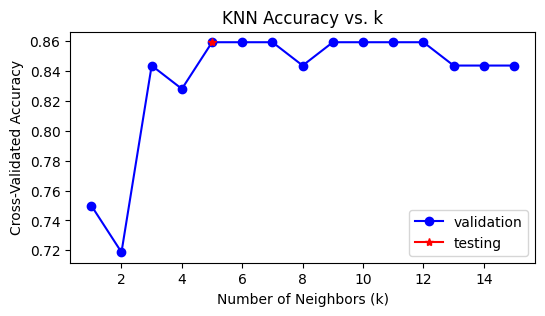

In [17]:
# Extract values of k and corresponding mean test scores
k_values = [param['knn__n_neighbors'] for param in grid.cv_results_['params']]
accuracies = grid.cv_results_['mean_test_score']

# Plot
plt.figure(figsize=(6, 3))
plt.plot(k_values, accuracies, marker='o', color='blue', label='validation')
plt.plot(grid.best_params_['knn__n_neighbors'], grid.best_score_, marker='*', color='red', label='testing')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy vs. k')
plt.legend(loc='best')
plt.show()

## Standardization

In [18]:
#scale features (KNN is distance-based and benefits from scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Testing KNN model with the best k

In [19]:
KNN = KNeighborsClassifier(n_neighbors = grid.best_params_['knn__n_neighbors'])
KNN.fit(x_train, y_train)
KNN.predict(x_test)
KNN.score(x_test, y_test)

0.8125

So, the best KNN model found is k = 5 with 5 selected features.

# Implementing Decision Tree (DT)

Prepare the dataset

In [20]:
x = XY[['Albumin','Protime','Bilirubin','Ascites','Histology']]
y = XY['Class']

#print the feature shape and classes of dataset
(N,D), C = x.shape, np.max(y)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')


instances (N) 	 80 
 features (D) 	 5 
 classes (C) 	 2


## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 108, stratify=y)

## Cross-Validation to find the hyperparameter max depth

In [28]:
from sklearn.tree import DecisionTreeClassifier

# 1. Define the model
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 108)

# 2. Define the range of tree depths to test
param_grid = {'max_depth': list(range(1, 9))}

# 3. Run GridSearchCV with accuracy scoring and 4-fold CV
grid = GridSearchCV(dt, param_grid, cv=4, scoring='accuracy')
grid.fit(x_train, y_train)

# 4. Best depth and best accuracy
print("Best depth:", grid.best_params_['max_depth'])
print("Best cross-validated accuracy:", grid.best_score_)


Best depth: 3
Best cross-validated accuracy: 0.859375


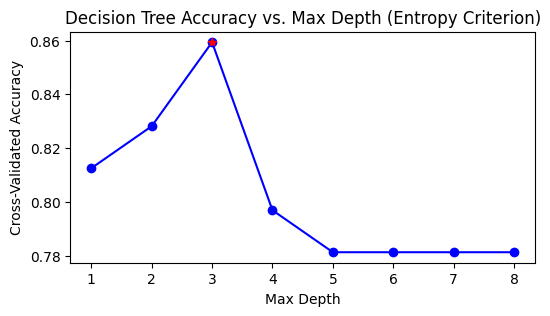

In [29]:
# Extract results
depths = [d['max_depth'] for d in grid.cv_results_['params']]
accuracies = grid.cv_results_['mean_test_score']

# Plot
plt.figure(figsize=(6, 3))
plt.plot(depths, accuracies, marker='o', color='blue', label='validation')
plt.plot(grid.best_params_['max_depth'], grid.best_score_, marker='*', color='red', label='testing')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth (Entropy Criterion)')
plt.show()


## Testing DT model with the best max depth

In [30]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = grid.best_params_['max_depth'], random_state = 108)
DT.fit(x_train, y_train)
DT.predict(x_test)
DT.score(x_test, y_test)

1.0

# Compareing the models with ROC & PRC curves

From the EDA, we know that the target labels are unbalanced toward the positive class. Therefore, PRC is a better choice to compare the results than ROC.

In [59]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay

# Random (baseline) classifier
RND = DummyClassifier(strategy = 'uniform')
RND.fit(x_train, y_train)

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train, y_train)

DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
DT.fit(x_train, y_train)

# Probabilities for the positive class (label 1)
KNN_probs = KNN.predict_proba(x_test)[:, 1]
DT_probs = DT.predict_proba(x_test)[:, 1]
RND_probs = RND.predict_proba(x_test)[:, 1]
print(KNN_probs)
print(DT_probs)
print(RND_probs)



[1.  0.6 0.8 1.  0.6 1.  0.6 0.8 1.  0.8 1.  1.  1.  0.2 0.2 0.8]
[0.75  0.125 0.75  1.    1.    1.    1.    1.    1.    1.    0.75  1.
 1.    0.125 0.125 0.75 ]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


## ROC for KNN, DT and Random calssifiers

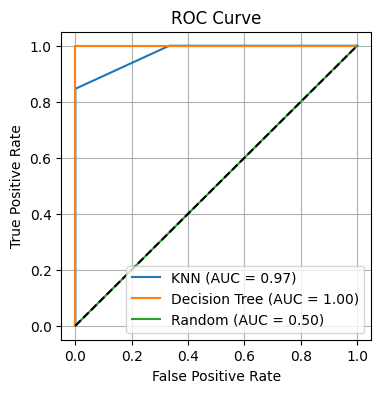

In [60]:
plt.figure(figsize=(4, 4))

for name, probs in zip(['KNN', 'Decision Tree', 'Random'],
                       [KNN_probs, DT_probs, RND_probs]):
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    del roc_auc

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


## PRC for KNN, DT and Random classifiers

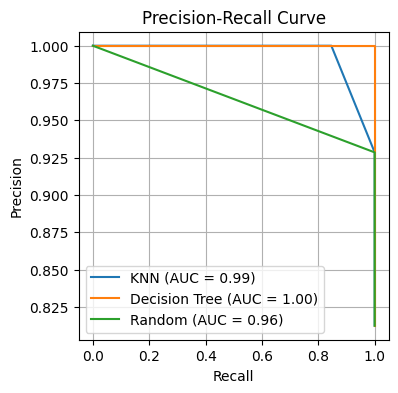

In [56]:
RND = DummyClassifier(strategy='stratified')  # predicts based on class distribution
RND.fit(x_train, y_train)
RND_probs = RND.predict_proba(x_test)[:, 1]

plt.figure(figsize=(4, 4))

for name, probs in zip(['KNN', 'Decision Tree', 'Random'],
                       [KNN_probs, DT_probs, RND_probs]):
    precision, recall, _ = precision_recall_curve(y_test, probs)
    prc_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AUC = {prc_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()




# 2- KNN and DT on Diabetic Retinopathy Debrecen dataset

# Exploratory Data Analysis

## Importing the second dataset

Fetch the dataset from UCI repository https://archive.ics.uci.edu/dataset/329/diabetic+retinopathy+debrecen

In [61]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetic_retinopathy_debrecen = fetch_ucirepo(id=329)

# metadata
print(diabetic_retinopathy_debrecen.metadata)

# variable information
print(diabetic_retinopathy_debrecen.variables)

{'uci_id': 329, 'name': 'Diabetic Retinopathy Debrecen', 'repository_url': 'https://archive.ics.uci.edu/dataset/329/diabetic+retinopathy+debrecen', 'data_url': 'https://archive.ics.uci.edu/static/public/329/data.csv', 'abstract': 'This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1151, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5XP4P', 'creators': ['Balint Antal', 'Andras Hajdu'], 'intro_paper': {'ID': 226, 'type': 'NATIVE', 'title': 'An ensemble-based system for automatic screening of diabetic retinopathy', 'authors': 'B. Antal, A. Hajdu', 'venue': 

## Handling missing values

In [87]:
# data (as pandas dataframes)
X2 = diabetic_retinopathy_debrecen.data.features
X2.columns.values[11] = 'exudate4'
y2 = diabetic_retinopathy_debrecen.data.targets
XY2 = pd.concat([X2, y2], axis = 1)


XY2.head()

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate4,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,5.270920,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,3.325423,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,12.687485,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,9.118901,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.410381,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [88]:
#Check the number of missing values for each feature
XY2.isnull().sum()

,0
quality,0
pre_screening,0
ma1,0
ma2,0
ma3,0
ma4,0
ma5,0
ma6,0
exudate1,0
exudate2,0


## Correlation of features with target

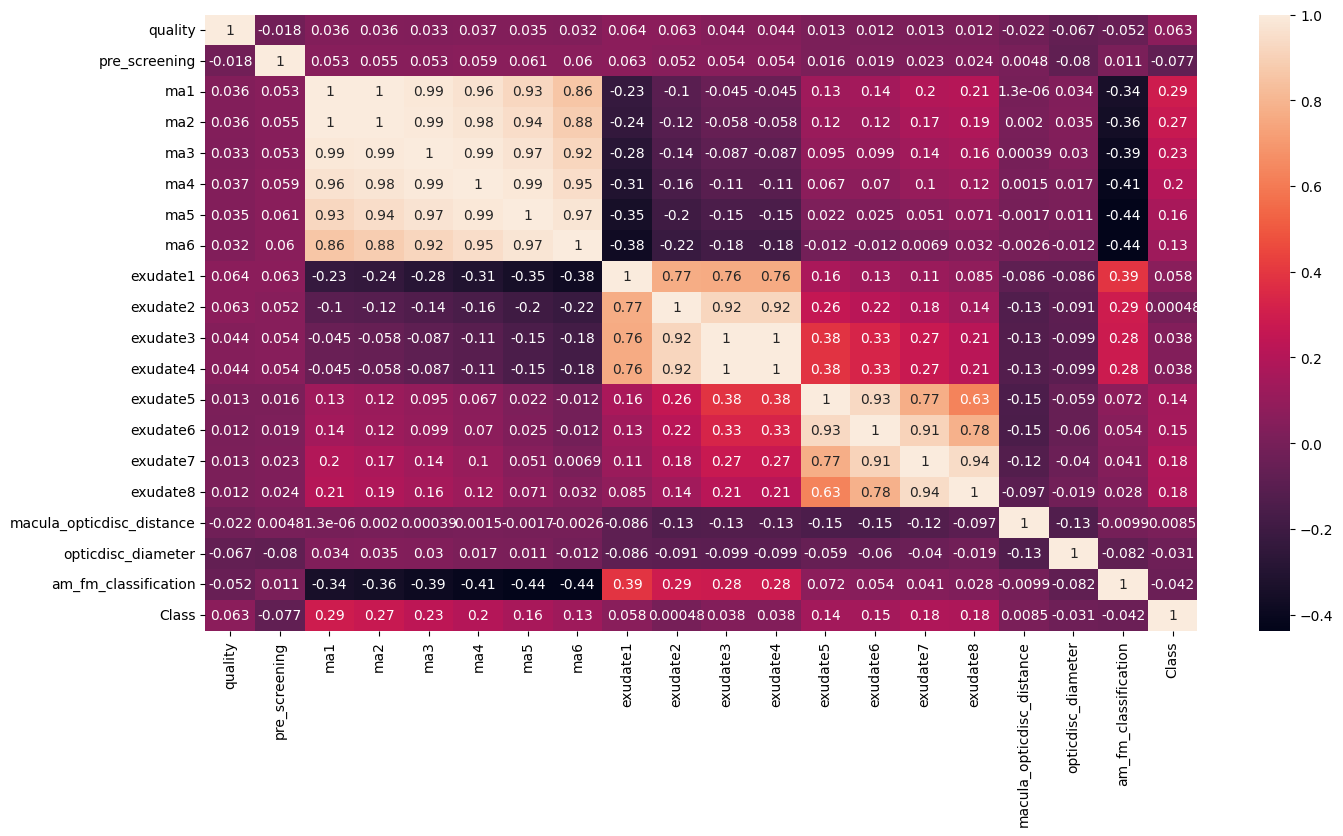

In [89]:
plt.figure(figsize = (16,8))
sns.heatmap(XY2.corr(), annot=True)
plt.show()

## Data basic stats and distributions

Compute basic statistics and the distributions of the features and the target data.

In [90]:
XY2.describe()

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate4,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,8.704610,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,11.567589,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,1.249050,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,4.423472,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,11.766880,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,106.070092,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


### Distribution of the target

<ipython-input-91-ce6d9f899a70>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  class_count = sns.countplot(x="Class", data = XY2, palette=["orange", "blue"])
<ipython-input-91-ce6d9f899a70>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['sign of DR','no sign of DR']);


Text(0.5, 1.0, 'Count of Outcome')

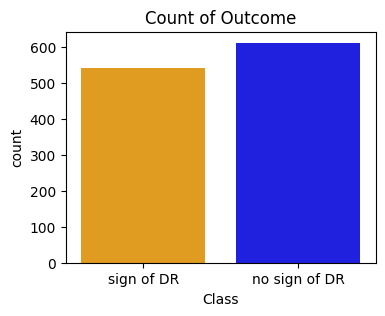

In [91]:
plt.figure(figsize=(4, 3))
class_count = sns.countplot(x="Class", data = XY2, palette=["orange", "blue"])
plt.gca().set_xticklabels(['sign of DR','no sign of DR']);
class_count.set_title("Count of Outcome")

Note from the figure above that the target or outcome is roughly balanced.

### Distribution of continuous features

In [92]:
print(XY2.columns.tolist())

['quality', 'pre_screening', 'ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6', 'exudate1', 'exudate2', 'exudate3', 'exudate4', 'exudate5', 'exudate6', 'exudate7', 'exudate8', 'macula_opticdisc_distance', 'opticdisc_diameter', 'am_fm_classification', 'Class']


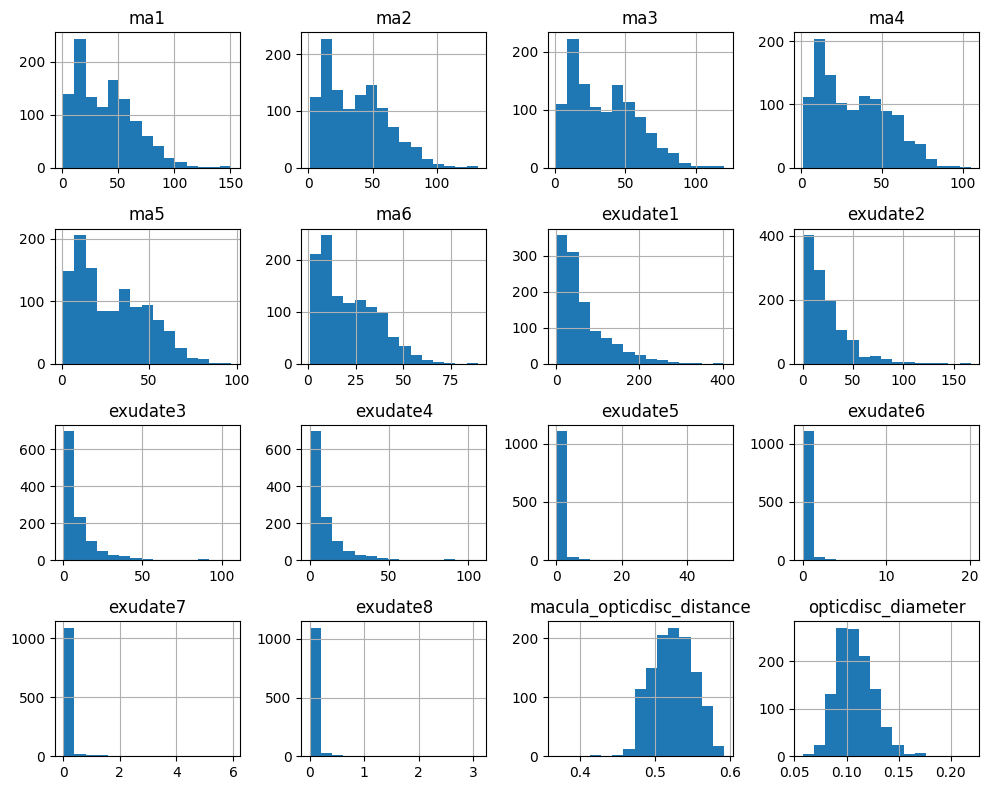

In [93]:
XY2.drop(columns=['quality', 'pre_screening', 'am_fm_classification', 'Class']).hist(
    figsize=(10, 8), bins=15, layout=(4, 4))
plt.tight_layout()
plt.show()

### Distribution of categorical features

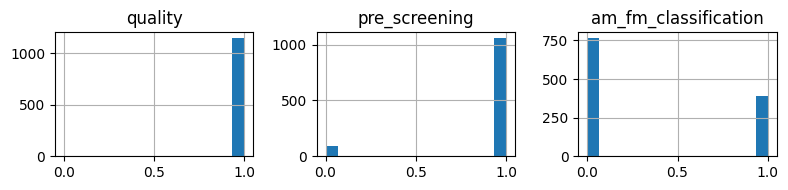

In [94]:
XY2[['quality', 'pre_screening', 'am_fm_classification']].hist(
    figsize=(8, 2), bins=15, layout=(1, 3))
plt.tight_layout()
plt.show()

## Feature importance using statistical analysis

KNN model doesn't automatically decide which features are the most important.
I test the feature importance with the binary target data using:
- ANOVA test for the numerical features
- Chi-square test for the categorical features

### Feature importance using ANOVA test

In [95]:
Columns = XY2.drop(columns=['quality', 'pre_screening', 'am_fm_classification']).columns.tolist()
print(Columns)

['ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6', 'exudate1', 'exudate2', 'exudate3', 'exudate4', 'exudate5', 'exudate6', 'exudate7', 'exudate8', 'macula_opticdisc_distance', 'opticdisc_diameter', 'Class']


In [96]:
from scipy.stats import f_oneway

Columns = XY2.drop(columns=['quality', 'pre_screening', 'am_fm_classification']).columns.tolist()
XY2_clean = XY2.dropna(subset=Columns + ['Class'])

for column in Columns:
    groups = XY2_clean.groupby('Class')[column].apply(list)

    # Check we have at least two groups with more than 1 value
    if len(groups) >= 2 and all(len(g) > 1 for g in groups):
        anova = f_oneway(*groups)
        print(f"{column} - F-statistic: {anova.statistic:.4f}")
        print(f"{column} - P-Value: {anova.pvalue:.4f}")
    else:
        print(f"{column} - Not enough data for ANOVA")
    print()

ma1 - F-statistic: 107.5843
ma1 - P-Value: 0.0000

ma2 - F-statistic: 87.7284
ma2 - P-Value: 0.0000

ma3 - F-statistic: 66.9758
ma3 - P-Value: 0.0000

ma4 - F-statistic: 46.6427
ma4 - P-Value: 0.0000

ma5 - F-statistic: 30.8222
ma5 - P-Value: 0.0000

ma6 - F-statistic: 19.0965
ma6 - P-Value: 0.0000

exudate1 - F-statistic: 3.8803
exudate1 - P-Value: 0.0491

exudate2 - F-statistic: 0.0003
exudate2 - P-Value: 0.9870

exudate3 - F-statistic: 1.6863
exudate3 - P-Value: 0.1944

exudate4 - F-statistic: 1.6863
exudate4 - P-Value: 0.1944

exudate5 - F-statistic: 23.7381
exudate5 - P-Value: 0.0000

exudate6 - F-statistic: 26.9641
exudate6 - P-Value: 0.0000

exudate7 - F-statistic: 40.6143
exudate7 - P-Value: 0.0000

exudate8 - F-statistic: 37.2970
exudate8 - P-Value: 0.0000

macula_opticdisc_distance - F-statistic: 0.0824
macula_opticdisc_distance - P-Value: 0.7742

opticdisc_diameter - F-statistic: 1.0958
opticdisc_diameter - P-Value: 0.2954

Class - F-statistic: inf
Class - P-Value: 0.0000



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


From the above results, the most important features are the ones with the highest F-Statistic; I choose from the ones that are less correlated. So, the best 2 in descending order are: ma1, exudate7.

### Feature importance using Chi² test

In [97]:
from scipy.stats import chi2_contingency

Columns = ['quality', 'pre_screening', 'am_fm_classification']

for column in Columns:
    # Drop rows with NaNs in the current column or 'Class'
    data_clean = XY2.dropna(subset=[column, 'Class'])

    # Create contingency table
    table = pd.crosstab(data_clean['Class'], data_clean[column])

    # Check for valid shape
    if table.shape[0] >= 2 and table.shape[1] >= 2:
        chi2_stat, p_value, dof, expected = chi2_contingency(table)
        print(f"{column} - Chi\u00b2 statistic: {chi2_stat:.4f}")
        print(f"{column} - P-Value: {p_value:.4f}")
    else:
        print(f"{column} - Not enough data for Chi-square test")
    print()


quality - Chi² statistic: 2.6546
quality - P-Value: 0.1032

pre_screening - Chi² statistic: 6.2598
pre_screening - P-Value: 0.0124

am_fm_classification - Chi² statistic: 1.8695
am_fm_classification - P-Value: 0.1715



From the above results, the most important feature is the ones with the smallest p-values; so, the only significant one here is: pre_screening.

# Implementing KNN

From the correlation matrix and the Anova and Chi² tests, I took the 3 best numerical and categorical features ma1, exudate7 and pre_screening for classification.

Prepare the dataset

In [123]:
x2 = XY2[['ma1','exudate7', 'pre_screening']]
y2 = XY2['Class']

#print the feature shape and classes of dataset
(N,D), C = x2.shape, np.max(y2)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')


instances (N) 	 1151 
 features (D) 	 3 
 classes (C) 	 2


## Train Test Split

In [124]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 108, stratify=y2)

## Cross-Validation to find the hyperparameter K

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#scale features (KNN is distance-based and benefits from scaling)
scaler = StandardScaler()
knn = KNeighborsClassifier()

# Define a pipeline: scaling + KNN
pipeline = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])

# Range of k values to test
param_grid = {'knn__n_neighbors': list(range(1, 16))}

# GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train2, y_train2)

# Best result
print("Best k:", grid.best_params_['knn__n_neighbors'])
print("Best cross-validated accuracy:", grid.best_score_)

Best k: 11
Best cross-validated accuracy: 0.6304347826086956


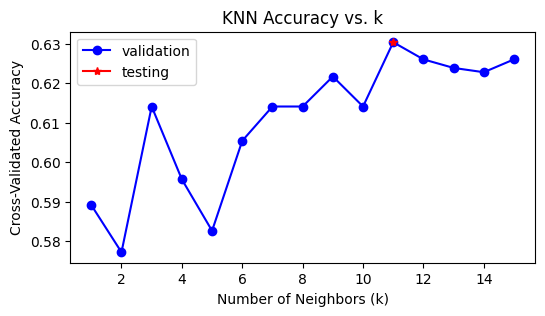

In [126]:
# Extract values of k and corresponding mean test scores
k_values = [param['knn__n_neighbors'] for param in grid.cv_results_['params']]
accuracies = grid.cv_results_['mean_test_score']

# Plot
plt.figure(figsize=(6, 3))
plt.plot(k_values, accuracies, marker='o', color='blue', label='validation')
plt.plot(grid.best_params_['knn__n_neighbors'], grid.best_score_, marker='*', color='red', label='testing')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy vs. k')
plt.legend(loc='best')
plt.show()

## Standardization

In [127]:
#scale features (KNN is distance-based and benefits from scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


# Select all columns except the last one (binary)
cols_to_scale = x_train2.columns[:-1]

# Fit on training, transform both
x_train2[cols_to_scale] = sc.fit_transform(x_train2[cols_to_scale])
x_test2[cols_to_scale] = sc.transform(x_test2[cols_to_scale])

x_train2.head()

,ma1,exudate7,pre_screening
283,1.470824,-0.160333,1
651,0.702203,-0.123980,1
1027,1.547687,-0.223823,1
916,-0.835041,0.219262,1
211,0.779065,-0.223823,1


## Testing KNN model with the best k

In [130]:
KNN = KNeighborsClassifier(n_neighbors = grid.best_params_['knn__n_neighbors'])
KNN.fit(x_train2, y_train2)
KNN.predict(x_test2)
KNN.score(x_test2, y_test2)

0.6233766233766234

So, the best KNN model found is k = 11 with 3 selected features.

# Implementing Decision Tree (DT)

Prepare the dataset

In [131]:
x2 = XY2[['ma1','exudate7', 'pre_screening']]
y2 = XY2['Class']

#print the feature shape and classes of dataset
(N,D), C = x2.shape, np.max(y2)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')


instances (N) 	 1151 
 features (D) 	 3 
 classes (C) 	 2


## Train Test Split

In [133]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 108, stratify=y2)

## Cross-Validation to find the hyperparameter max depth

In [142]:
from sklearn.tree import DecisionTreeClassifier

# 1. Define the model
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 108)

# 2. Define the range of tree depths to test
param_grid = {'max_depth': list(range(1, 9))}

# 3. Run GridSearchCV with accuracy scoring and 10-fold CV
grid = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train2, y_train2)

# 4. Best depth and best accuracy
print("Best depth:", grid.best_params_['max_depth'])
print("Best cross-validated accuracy:", grid.best_score_)


Best depth: 2
Best cross-validated accuracy: 0.6434782608695652


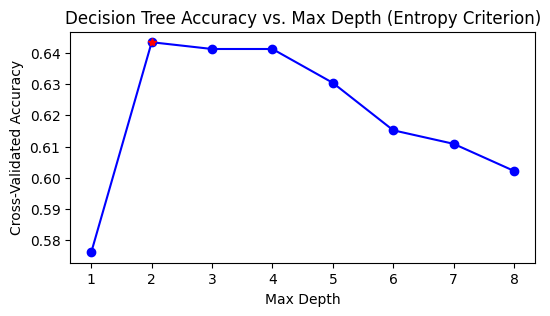

In [143]:
# Extract results
depths = [d['max_depth'] for d in grid.cv_results_['params']]
accuracies = grid.cv_results_['mean_test_score']

# Plot
plt.figure(figsize=(6, 3))
plt.plot(depths, accuracies, marker='o', color='blue', label='validation')
plt.plot(grid.best_params_['max_depth'], grid.best_score_, marker='*', color='red', label='testing')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth (Entropy Criterion)')
plt.show()


## Testing DT model with the best max depth

In [144]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth = grid.best_params_['max_depth'], random_state = 108)
DT.fit(x_train2, y_train2)
DT.predict(x_test2)
DT.score(x_test2, y_test2)

0.6363636363636364

# Compareing the models with ROC & PRC curves

ROC

In [146]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay

#scale features (KNN is distance-based and benefits from scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


# Select all columns except the last one (binary)
cols_to_scale = x_train2.columns[:-1]

# Fit on training, transform both
x_train2[cols_to_scale] = sc.fit_transform(x_train2[cols_to_scale])
x_test2[cols_to_scale] = sc.transform(x_test2[cols_to_scale])



# Random (baseline) classifier
RND = DummyClassifier(strategy = 'uniform')
RND.fit(x_train2, y_train2)

KNN = KNeighborsClassifier(n_neighbors = 11)
KNN.fit(x_train2, y_train2)

DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
DT.fit(x_train2, y_train2)

# Probabilities for the positive class (label 1)
KNN_probs = KNN.predict_proba(x_test2)[:, 1]
DT_probs = DT.predict_proba(x_test2)[:, 1]
RND_probs = RND.predict_proba(x_test2)[:, 1]
print(KNN_probs)
print(DT_probs)
print(RND_probs)



[0.45454545 0.54545455 0.36363636 0.45454545 1.         0.45454545
 0.45454545 0.54545455 0.45454545 0.27272727 0.36363636 0.81818182
 0.18181818 0.36363636 0.36363636 0.36363636 0.27272727 0.72727273
 0.72727273 0.72727273 0.45454545 0.36363636 0.72727273 0.18181818
 0.45454545 0.36363636 0.63636364 0.36363636 0.54545455 1.
 0.27272727 0.18181818 0.36363636 0.54545455 0.54545455 0.18181818
 0.63636364 0.27272727 0.63636364 0.27272727 0.54545455 0.45454545
 0.45454545 0.90909091 0.72727273 0.45454545 0.54545455 0.90909091
 0.72727273 0.45454545 0.63636364 0.63636364 0.54545455 0.27272727
 0.54545455 0.81818182 0.63636364 0.36363636 0.36363636 0.27272727
 0.45454545 0.81818182 0.54545455 0.27272727 0.18181818 0.54545455
 0.27272727 1.         0.54545455 0.36363636 0.81818182 0.63636364
 0.27272727 1.         0.54545455 0.09090909 0.36363636 0.45454545
 0.72727273 0.45454545 0.27272727 0.36363636 0.81818182 0.54545455
 1.         0.54545455 0.27272727 1.         0.90909091 0.45454545
 0.

## ROC for KNN, DT and Random calssifiers

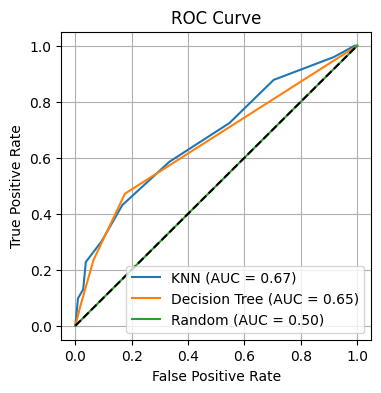

In [147]:
plt.figure(figsize=(4, 4))

for name, probs in zip(['KNN', 'Decision Tree', 'Random'],
                       [KNN_probs, DT_probs, RND_probs]):
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    del roc_auc

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


## PRC for KNN, DT and Random classifiers

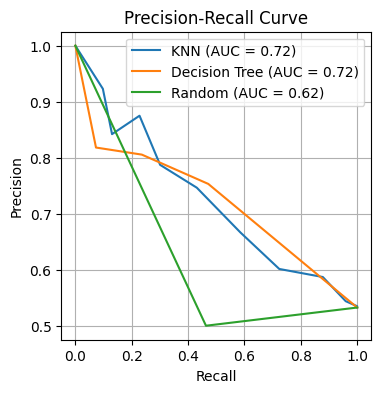

In [152]:
RND = DummyClassifier(strategy='stratified')  # predicts based on class distribution
RND.fit(x_train2, y_train2)
RND_probs = RND.predict_proba(x_test2)[:, 1]

plt.figure(figsize=(4, 4))

for name, probs in zip(['KNN', 'Decision Tree', 'Random'],
                       [KNN_probs, DT_probs, RND_probs]):
    precision, recall, _ = precision_recall_curve(y_test, probs)
    prc_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AUC = {prc_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


